In [1]:
!pip install --upgrade deepface
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=1b7b0884c019f37873843e33d55d9c5bb11d0807e4a7fde6092ca79fc091d842
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from deepface import DeepFace

25-04-15 16:55:45 - Directory /root/.deepface has been created
25-04-15 16:55:45 - Directory /root/.deepface/weights has been created


In [2]:
data = pd.read_csv('combined_dataset (1).csv')
data

,label,file_name,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,Parinaz_Izadyar,94DE3F03-84D1-41F3-B552-B04189C0A7B8-0.jpg,-0.007708,0.233697,0.087400,0.074033,-0.102366,-0.155271,-0.002658,-0.326364,...,0.120296,-0.100207,0.051751,-0.303385,0.042774,0.016580,-0.190791,0.377465,0.185442,0.106136
1,Parinaz_Izadyar,parinaz izadiyar 1-0.jpg,-0.269024,0.718245,-0.208513,-0.725545,0.090199,0.499550,-0.277418,-0.133463,...,-1.418919,0.187079,0.479327,-0.935540,0.400676,-0.422395,-0.083492,0.021310,-0.583048,-1.522397
2,Parinaz_Izadyar,1325399_262-0.jpg,-0.013952,0.240428,0.126876,0.302956,0.002949,0.005396,0.019753,-0.071015,...,0.190131,0.054496,-0.272203,0.231284,0.079779,-0.090597,0.044998,0.155852,0.046355,-0.320835
3,Parinaz_Izadyar,168912099-0.jpg,-0.054381,0.028873,-0.056773,-0.218005,-0.143187,-0.163924,0.088036,-0.194996,...,-0.209077,-0.050202,-0.169068,-0.125432,0.004051,-0.005991,-0.150074,0.190043,0.453737,0.064257
4,Parinaz_Izadyar,1689230379-samatak-com-0.jpg,-0.085848,0.278685,0.189760,0.017680,-0.271534,-0.100658,0.120270,-0.086372,...,-0.098988,0.113318,-0.090768,-0.282465,0.148920,0.112117,-0.040098,0.300814,0.273610,0.148427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,Asghar_Farhadi,Asghar-Farhadi00-0.jpg,0.131944,-0.267918,-0.085229,-0.114417,0.037700,-0.040603,-0.107297,-0.008783,...,0.126079,-0.379651,0.001746,0.269970,0.153501,0.192835,-0.119672,-0.123832,-0.033102,-0.100274
1649,Asghar_Farhadi,asghar-farhadi-0.jpg,0.143099,-0.006039,-0.368866,-0.124644,0.089803,-0.100049,0.037976,0.041453,...,-0.147745,-0.229091,0.098566,0.111240,0.303852,-0.022491,-0.297193,-0.023300,-0.130882,-0.086917
1650,Asghar_Farhadi,dfgtyu.jpg,0.090046,-0.086470,-0.091488,0.026802,0.206368,-0.050472,0.018689,0.121937,...,-0.041697,-0.074195,-0.103093,0.084471,0.158949,0.062634,-0.171623,0.081193,0.122172,-0.069988
1651,Asghar_Farhadi,4582khh.jpg,0.090191,-0.253805,-0.333985,-0.211771,0.092814,-0.070794,0.071828,0.089822,...,-0.124347,-0.125870,0.017486,0.069403,0.184259,0.181012,-0.101321,0.130063,-0.143397,-0.052122


In [3]:
X = data.iloc[:, 2:].values
y = pd.factorize(data['label'])[0]

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Validation data: {X_val.shape}, {y_val.shape}")
print(f"Test data: {X_test.shape}, {y_test.shape}")

Training data: (1157, 512), (1157,)
Validation data: (248, 512), (248,)
Test data: (248, 512), (248,)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=200,
                    batch_size=32)


model.save('saved_model_format', save_format='tf')
model.save('model.keras')
model.save('model.h5')



Epoch 1/200
37/37 [==============================] - 3s 26ms/step - loss: 3.2190 - accuracy: 0.1806 - val_loss: 2.5441 - val_accuracy: 0.4677
Epoch 2/200
37/37 [==============================] - 1s 21ms/step - loss: 1.7575 - accuracy: 0.6214 - val_loss: 1.0061 - val_accuracy: 0.8105
Epoch 3/200
37/37 [==============================] - 1s 19ms/step - loss: 0.8402 - accuracy: 0.8150 - val_loss: 0.6900 - val_accuracy: 0.8589
Epoch 4/200
37/37 [==============================] - 1s 15ms/step - loss: 0.6021 - accuracy: 0.8608 - val_loss: 0.6375 - val_accuracy: 0.8548
Epoch 5/200
37/37 [==============================] - 1s 14ms/step - loss: 0.4892 - accuracy: 0.8755 - val_loss: 0.6017 - val_accuracy: 0.8589
Epoch 6/200
37/37 [==============================] - 1s 14ms/step - loss: 0.4350 - accuracy: 0.8868 - val_loss: 0.5960 - val_accuracy: 0.8589
Epoch 7/200
37/37 [==============================] - 1s 18ms/step - loss: 0.4178 - accuracy: 0.8937 - val_loss: 0.5893 - val_accuracy: 0.8669
Epoch 

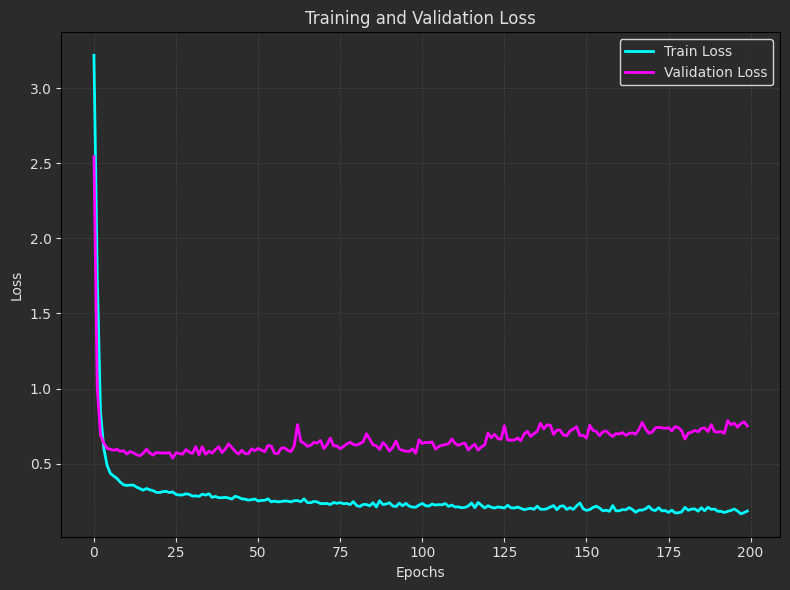

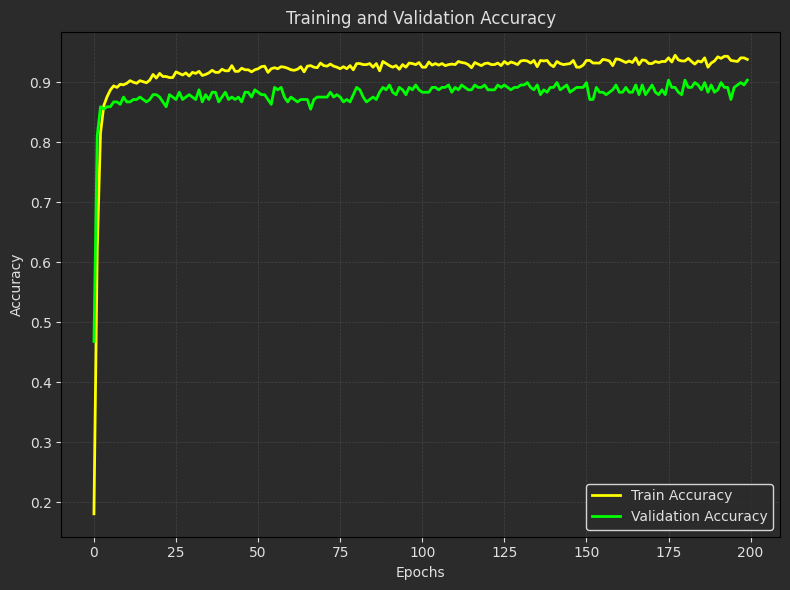

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')

ax.plot(history.history['loss'], label='Train Loss', color='cyan', linewidth=2)
ax.plot(history.history['val_loss'], label='Validation Loss', color='magenta', linewidth=2)

ax.set_title('Training and Validation Loss', color='#e0e0e0')
ax.set_xlabel('Epochs', color='#e0e0e0')
ax.set_ylabel('Loss', color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b')
ax.legend(facecolor='#2b2b2b', edgecolor='white', labelcolor='#e0e0e0')

plt.tight_layout()



fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')

ax.plot(history.history['accuracy'], label='Train Accuracy', color='yellow', linewidth=2)
ax.plot(history.history['val_accuracy'], label='Validation Accuracy', color='lime', linewidth=2)

ax.set_title('Training and Validation Accuracy', color='#e0e0e0')
ax.set_xlabel('Epochs', color='#e0e0e0')
ax.set_ylabel('Accuracy', color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b')
ax.legend(facecolor='#2b2b2b', edgecolor='white', labelcolor='#e0e0e0')

plt.tight_layout()

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


8/8 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.9032
Test Loss: 0.4285725951194763
Test Accuracy: 0.9032257795333862


In [9]:
model = tf.keras.models.load_model('saved_model_format')

def predict_image(image_path, model, label_mapping, model_name="ArcFace"):

    embedding_objs = DeepFace.represent(img_path=image_path, model_name=model_name)
    embedding = embedding_objs[0]['embedding']
    embedding = np.array(embedding).reshape(1, -1)


    prediction = model.predict(embedding)
    predicted_label_index = np.argmax(prediction)
    predicted_label = label_mapping[predicted_label_index]

    return predicted_label

label_mapping = data['label'].factorize()[1]


image_path = '/content/257094_507-1.jpg'
predicted_label = predict_image(image_path, model, label_mapping)
print(f"Predicted Label: {predicted_label}")


1/1 [==============================] - 0s 138ms/step
Predicted Label: Dariush_Arjmand
